### Bayesian Changepoint Model
The Bayesian Changepoints model scores changepoint probability in a univariate sequential dataset, often a time series.

**Changepoint: ** Changepoints are abrupt changes in the mean or variance of a time series. For instance, during an economic recession, stock values might suddenly drop to a very low value. The time at which the stock value dropped is called a changepoint.

The Bayesian Changepoints model has two variants:
1. Bayesian Offline Changepoint Detection [https://arxiv.org/pdf/0910.3099.pdf]
2. Bayesian Online Changepoint Detection [https://arxiv.org/pdf/0710.3742v1.pdf]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from __future__ import division

# uncomment this if not installed 
# !pip install bayesian_changepoint_detection  

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def generate_normal_time_series(distributions ,  minl = 50 , maxl= 5000):
    
    # intialising blank array to store genrated data
    data = np.array([], dtype = np.float64)
    
    # generating count of datapoints for each value in (0,num) to generate normal distributions
    partition = np.random.randint(minl, maxl,distributions)
    
    # generating datapoints for 
    for datapoints in partition:
        # mean and variance for each distribution
        mean = np.random.randn()*10
        var = np.random.randn()*1
        
        # converting negative variance value to positive
        if var<0:
            var *= -1
            
        # using the mean and varince generated above to create Normal Distribution
        tdata = np.random.normal(mean,var,datapoints )
        
        # appending the distribution into data array
        data =  np.concatenate((data, tdata))
    
    # returning data array 
    return data
        
            

In [8]:
# calling the function
data = generate_normal_time_series(6, 100, 300)
data[:5]

array([7.80412847, 7.64020008, 7.85251397, 7.94461998, 7.779728  ])

So the data has been generated.
Let's take a look at the Line Plot and Verify that there are indeed 10 distinct distributions in data 

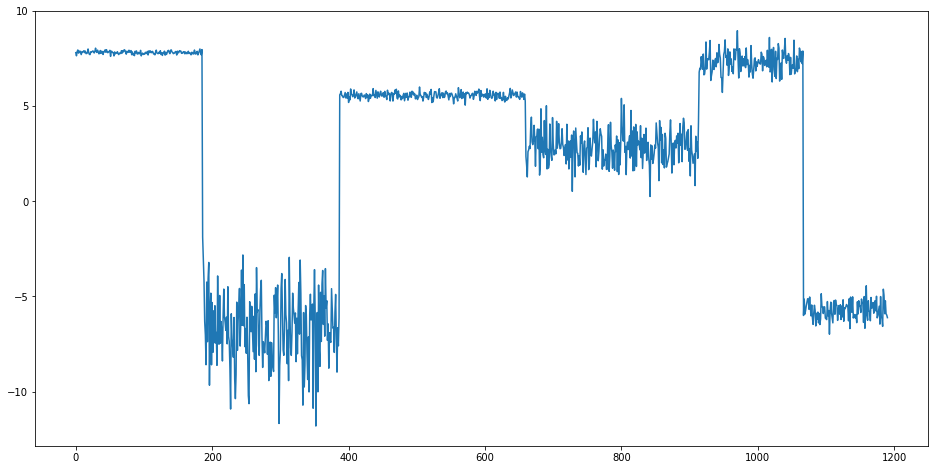

In [9]:
fig, ax = plt.subplots(figsize=[16, 8])
ax.plot(data)
plt.show()

### Offline Changepoint Detection
Lets compute the probability of changepoints at each time step. We need two things for that.
- First a prior of how probable is it to have two successive changepoints with the distance t. 
- The second thing is a model of the likelihood of data in a sequence [s, t] of the data, given that in this sequence there is no changepoint.

For this example we assume a uniform prior over the length of sequences (const_prior) and a piecewise gaussian model (gaussian_obs_log_likelihood).



In [10]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial


Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l = len(data)+1), 
                                                offcd.gaussian_obs_log_likelihood, truncate = -40) 


#### The offline_changepoint_detection() function returns three things:
- Q[t], the log-likelihood of data [t, n]
- P[t, s], the log-likelihood of a datasequence [t, s]
- Given there is no changepoint between t and s and Pcp[i, t], the log-likelihood that the i-th changepoint is at time step t. 

To actually get the probability of a changepoint at time step t we can sum the Pcp probabilities.

**Now let's see how it looks like for our generated data:**

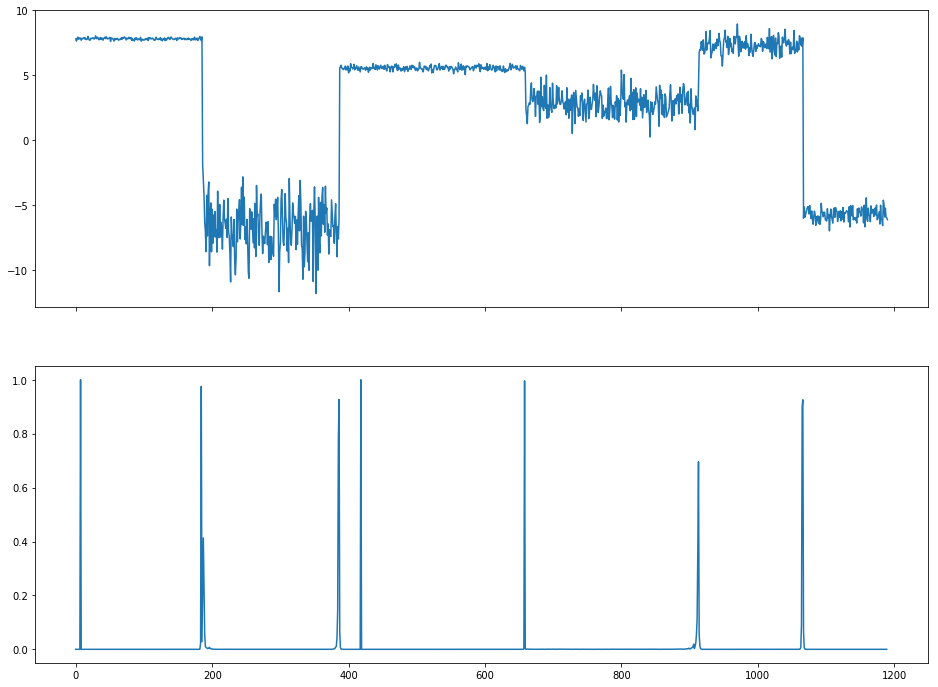

In [11]:
fig , ax = plt.subplots(2, sharex = True, figsize = (16, 12))

ax[0].plot(data[:])
ax[1].plot(np.exp(Pcp).sum(0))

plt.show()

 The algorithm uses bayesian reasoning, and it is online in the sense that it operates by reading one data point at a time and providing estimates of the likelihood of a changepoint at a given time based only on information up to that point in time.

hat works pretty well, but is somewhat slow. It's possible to speed that up by truncating a sum in the algorithm. However that sometimes leeds to ∞ values. Set the truncate parameter to e.g. -10 to test that out.

To understand, what is happening have a look at the following papers:

[1] Paul Fearnhead, Exact and Efficient Bayesian Inference for Multiple Changepoint problems, Statistics and computing 16.2 (2006), pp. 203--213 (https://arxiv.org/pdf/0910.3099.pdf)

[2]https://jeremy9959.net/Blog/bayesian-online-changepoint-fixed/

In [12]:
%pwd

'C:\\Users\\DataScientist\\Desktop\\SACHIN_KT_CPS\\CODE\\CODE'

#### Partial function 
Partial functions allow one to derive a function with x parameters to a function with fewer parameters and fixed values set for the more limited function.

In [7]:
# The following code will return 8
from functools import partial

def multiply(x,y):
        return x * y

# create a new function that multiplies by 2
dbl = partial(multiply,2)
print(dbl(4))

8
